In [13]:
from cntools.datasets import Dataset
from tensorly.decomposition import non_negative_tucker
import tensorly as tl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import sys
from general import cns_remap
import os
sys.path.insert(0, '..')
plt.rcParams["font.family"] = 'Arial'

In [14]:
patient_col = 'Sample'
image_col = 'Image'
neigh_col = 'CN'
ct_col = 'CT'

In [15]:
# Uncomment one of these results on CRC

cells_plot = ['CD11b+CD68+ macrophages', 'Tumor cells / immune cells', 'Adipocytes', 'CD68+ macrophages', 'Immune cells / vasculature', 
              'CD4+ T cells', 'Tregs', 'Plasma cells', 'Vasculature', 'B cells', 'CD4+ T cells CD45RO+', 'CD8+ T cells', 
              'Stroma', 'Granulocytes', 'Smooth muscle', 'CD68+CD163+ macrophages', 'Tumor cells']

# ds = pickle.load(open('../data/CRC/CRC_ds_ori.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df_ori.csv')
# out_dir = '../analysis_res/CRC/CC_ori'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CC_ori/cns.pkl', 'rb')), [0, 9, 1, 2, 3, 4, 5, 6, 7, 8])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Tumor boundry', 'CN-7: Vascularized smooth muscle', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']
# tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CC'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CC/cns_n_cns=9_m=10_naive.pkl', 'rb')), [1, 2, 6, 4, 7, 5, 3, 8, 0])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Immune cell enriched', 'CN-7: Plasma & vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']
# tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CF-IDF'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CF-IDF/cns_n_cns=9_eps=32_r=0.8_naive.pkl', 'rb')), [3, 4, 7, 8, 0, 5, 6, 2, 1])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Mixed', 'CN-6: Undefined cell enriched', 'CN-7: Immune cell / vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']
# tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
df = pd.read_csv('../data/CRC/CRC_df.csv')
out_dir = '../analysis_res/CRC/CNE'
nbs = [0, 1, 2, 3, 5, 6, 7, 8]
cns = cns_remap(pickle.load(open('../cn/CRC/CNE/cns_n_cns=9_perp=15_lam=0.25_naive.pkl', 'rb')), [2, 3, 7, 1, 8, 5, 6, 0, 4])
ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune. stroma & vasc.', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Immune cell enriched', 'CN-7: Plasma cell enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']
tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/Spatial LDA'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/Spatial LDA/cns_n_cns=9_eps=50_b=0.025_naive.pkl', 'rb')), [8, 2, 4, 0, 7, 6, 5, 3, 1])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: T cell & macrophage enriched', 'CN-5: Follicle', 'CN-6: Undefined cell enriched', 'CN-7: Macrophage, plasma cell & vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']
# tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/ClusterNet'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/ClusterNet/6first_16_70.0_naive.pkl', 'rb')), [8, 1, 3, 5, 0, 4, 2, 7, 6])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Macrophage & stroma enriched', 'CN-4: Macrophage & vasc. enriched', 'CN-5: Follicle', 'CN-6: Tumor boundry', 'CN-7: Plasma cell enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']
# tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/GAP'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/GAP/6first_labels_naive.pkl', 'rb')), [3, 0, 5, 2, 7, 6, 8, 1, 4])
# ind = ['CN-1: Mixed', 'CN-2: Bulk tumor & B cell enriched', 'CN-3: Mixed', 'CN-4: Macrophage enriched', 'CN-5: Mixed', 'CN-6: Tumor boundary', 'CN-7: Tumor boundary', 'CN-8: Mixed', 'CN-9: Mixed']
# tissue_modules = [['tumor compartment', 'immune compartment'], ['tumor & immune compartment', 'granulocyte compartment']]

In [16]:
cells = ds.ct_order
df_cells = np.zeros((len(df), len(cells)), dtype='int')
df_cells[[i for i in range(len(df))], [cells.index(i) for i in df[ct_col]]] = 1
df[cells] = df_cells

patients = list(ds.sample2group.keys())
patients_CLR = ds.group2sample['CLR']
patients_DII = ds.group2sample['DII']

In [17]:
df[neigh_col] = 0
for sample, df_sample in df.groupby(patient_col, sort=False):
    for image, df_image in df_sample.groupby(image_col, sort=False):
        df.loc[df_image.index, neigh_col] = cns[sample][image]
cells2 = pd.DataFrame(df, columns=cells + [neigh_col, patient_col, ct_col])
cells2

,Tumor cells,CD11c+ DCs,Tumor cells / immune cells,Smooth muscle,Lymphatics,Adipocytes,Undefined,CD4+ T cells CD45RO+,CD8+ T cells,CD68+CD163+ macrophages,...,CD11b+ monocytes,Immune cells,CD4+ T cells GATA3+,CD163+ macrophages,CD3+ T cells,CD4+ T cells,B cells,CN,Sample,CT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,Granulocytes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1,Granulocytes
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,Granulocytes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,Granulocytes
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,Granulocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4,29,CD3+ T cells
251024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,30,CD3+ T cells
251025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,31,CD3+ T cells
251026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,34,CD3+ T cells


In [18]:
all_freqs = cells2.groupby([patient_col, neigh_col])[cells].sum().reset_index()
for p in patients:
    for cn in nbs:
        if len(all_freqs[(all_freqs[patient_col] == p) & (all_freqs[neigh_col] == cn)]) == 0:
            all_freqs = all_freqs.append({patient_col: p, neigh_col: cn}, ignore_index=True).fillna(0)
all_freqs = all_freqs.sort_values(by=[patient_col, neigh_col]).reset_index(drop=True)

In [19]:
#build the tensors

#overall_counts = x.groupby('patients').apply(lambda x: x.loc[x['neighborhood10'].isin(nbs),:].sum(axis=0))
chks = cells
x = all_freqs

T1 = np.zeros((len(patients_CLR),len(nbs),len(chks)))
T2 = np.zeros((len(patients_DII),len(nbs),len(chks)))

for i,nb in enumerate(nbs):
    for j,chk in enumerate(chks):
        #T1[:,i,j] = x.loc[x['neighborhood10']==nb,:].set_index('patients').loc[group1_patients,chk].fillna(0).values/nbd_counts1[nb].values
        T1[:,i,j] = x.loc[x[neigh_col]==nb,:].set_index(patient_col).loc[patients_CLR,chk].fillna(0).values
 
for i,nb in enumerate(nbs):
    for j,chk in enumerate(chks):
        #T2[:,i,j] = x.loc[x['neighborhood10']==nb,:].set_index('patients').loc[group2_patients,chk].fillna(0).values/nbd_counts2[nb].values
        T2[:,i,j] = x.loc[x[neigh_col]==nb,:].set_index(patient_col).loc[patients_DII,chk].fillna(0).values

#normalize so we have joint distributions each slice
dat1 =np.nan_to_num(T1/T1.sum((1,2), keepdims = True))
dat2 =np.nan_to_num(T2/T2.sum((1,2), keepdims = True))

In [20]:
def build_tensor(patients,x,nbs,cells_of_interest):
    T = np.zeros((len(patients),len(nbs),len(cells_of_interest)))
    for i,nb in enumerate(nbs):
        for j,chk in enumerate(cells_of_interest):
            print(nb, chk)
            T[:,i,j] = x.loc[x[neigh_col]==nb,:].groupby(patient_col).sum().reindex(index=patients,columns=[chk]).fillna(0).values.squeeze()
        
        
    #normalize each patient's frequencies
    dat =np.nan_to_num(T/T.sum((1,2), keepdims = True))
    return dat

In [21]:
def decomposition_elbow(dat):
    pal = sns.color_palette('bright',10)
    palg = sns.color_palette('Greys',10)
    mat1 = np.zeros((6,15))
    #finding the elbow point
    for i in range(2,15):
        for j in range(1,6):
            facs_overall = non_negative_tucker(dat,rank=[j,i,i],random_state = 2336)
            mat1[j,i] = np.mean((dat- tl.tucker_to_tensor(tucker_tensor = (facs_overall[0],facs_overall[1])))**2)

    plt.figure(figsize=(10,5))
    plt.plot(2+np.arange(13),mat1[1][2:],c = 'blue',label = 'rank = (1,x,x)')
    plt.plot(2+np.arange(13),mat1[2][2:],c = 'red',label = 'rank = (2,x,x)')
    plt.plot(2+np.arange(13),mat1[3][2:],c = 'yellow',label = 'rank = (3,x,x)')
    plt.plot(2+np.arange(13),mat1[4][2:],c = 'green',label = 'rank = (4,x,x)')
    plt.plot(2+np.arange(13),mat1[5][2:],c = 'pink',label = 'rank = (5,x,x)')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('error')
    plt.show()

In [22]:
def tissue_module_plots(dat, person_rank,rank,patients,nbs,cells_of_interest,random_state = 0):
    facs_overall = non_negative_tucker(dat,rank=[person_rank,rank,rank],random_state = random_state)
    print(facs_overall[0].shape)
    sns.heatmap(pd.DataFrame(facs_overall[1][0], index=patients))
    plt.ylabel('Donor')
    plt.xlabel('Donor module')
    plt.title('Donor modules')
    plt.show()
    
    sns.heatmap(pd.DataFrame(facs_overall[1][1], index = nbs))
    plt.ylabel('CN')
    plt.xlabel('CN module')
    plt.title('CN modules')
    plt.show()
    
    plt.figure(figsize=(10,10))
    sns.heatmap(pd.DataFrame(facs_overall[1][2], index = cells_of_interest))
    plt.ylabel('CT')
    plt.xlabel('CT module')
    plt.title('CT modules')
    plt.show()
    
    print('--------Tissue modules ---------')
    for i in range(person_rank):
        
        sns.heatmap(pd.DataFrame(facs_overall[0][i]))
        plt.ylabel('CN module')
        plt.xlabel('CT module')
        plt.title('Tissue module {}'.format(i))
        plt.show()

    return facs_overall

In [23]:
# compute elbow point for decomposition
# decomposition_elbow(dat_1)
# decomposition_elbow(dat_2)

In [24]:
def tensor_plots(dats, ind, labels, cells, person_rank=2, rank=6, cells_plot=None, tissue_modules=[], scale=1, savename=None):
    plt.figure(figsize=(len(cells_plot)/8*scale*4, 2.00*scale*4)) # 3.67
    ax = plt.gca()
    nb_scatter_size = scale*scale*45
    cel_scatter_size = scale*scale*45
    pal = sns.color_palette('bright',10)
    palg = sns.color_palette('Greys',10)

    offset = len(nbs)
    offset_all = 0

    if not tissue_modules:
        tissue_modules = [[''] * person_rank] * len(dats)

    for dat_i, dat in enumerate(dats):
        facs_overall = non_negative_tucker(dat,rank=[person_rank,rank,rank],random_state = 0)
        facs_overall[0] = facs_overall[0]# [::-1]
        
        #script to draw the tissue modules (requires fine tuning for rescaling/positioning)
        for p in range(person_rank):
            idx2 = 0
            idx_idx2 = {}
            for idx in reversed(range(rank)):
                if np.max(facs_overall[0][p][idx,:])<=0.1 and np.max(facs_overall[0][p][:,idx])<=0.1:
                    continue
                idx_idx2[idx] = idx2
                an = float(np.max(facs_overall[0][p][idx,:])>0.1) + (np.max(facs_overall[0][p][idx,:])<=0.1)*0.05
                ac = float(np.max(facs_overall[0][p][:,idx])>0.1) + (np.max(facs_overall[0][p][:,idx])<=0.1)*0.05

                nb_fac = facs_overall[1][1][:,idx]
                cel_fac = facs_overall[1][2][:,idx]
                cel_fac = [cel_fac[cells.index(cell)] for cell in cells_plot if cell in cells]

                cols_alpha = [(*pal[nb], an*np.minimum(nb_fac, 1.0)[i]) for i,nb in enumerate(nbs)]
                cols = [(*pal[nb], np.minimum(nb_fac, 1.0)[i]) for i,nb in enumerate(nbs)]
                cell_cols_alpha = [(0,0,0, ac*np.minimum(cel_fac, 1.0)[i]) for i,_ in enumerate(cel_fac)]
                cell_cols = [(0,0,0, np.minimum(cel_fac, 1.0)[i]) for i,_ in enumerate(cel_fac)]

                ax.scatter(1*np.arange(len(nb_fac))+0.5, -2.5*idx2 + np.zeros(len(nb_fac)) - offset_all, c = cols_alpha, s = nb_scatter_size*2,edgecolors=len(cols_alpha)*[(0,0,0,min(1.0,max(0.1,2*an)))], linewidths= 0.5)
                ax.scatter(1*np.arange(len(cel_fac))+offset+1.5, -2.5*idx2 + np.zeros(len(cel_fac))- offset_all, c = cell_cols_alpha, s = cel_scatter_size*2,vmax = 0.5,edgecolors=len(cell_cols_alpha)*[(0,0,0,min(1.0,max(0.1,2*ac)))], linewidths= 0.5)
                rect = plt.Rectangle((0, -2.5*idx2 - 1 - offset_all),len(nbs),2,linewidth=scale*scale*1,edgecolor='black',facecolor='none',zorder = 0,alpha = an,linestyle = '--')
                ax.add_artist(rect)
                ax.scatter([offset],[-2.5*idx2 - offset_all],c = 'black', marker = 'D', s = scale*scale*5, zorder = 5,alpha = an)
                ax.scatter([offset+1],[-2.5*idx2 - offset_all],c = 'black', marker = 'D', s = scale*scale*5, zorder = 5,alpha = ac)

                rect = plt.Rectangle((offset+1, -2.5*idx2 - 1 - offset_all),len(cells_plot),2,linewidth=scale*scale*1,edgecolor='black',facecolor='none',zorder = 0, alpha = ac,linestyle = '-.')
                ax.add_artist(rect)

                ax.text(-0.25, -2.5*idx2 - offset_all, f'{rank-idx}', ha = 'center', va = 'center', color = 'black', fontsize = scale*12,alpha = 1)
                idx2 += 1

            ax.text((len(nbs)+len(cells_plot)+1)/2, 4 - offset_all, f'{labels[dat_i]} tissue module {p+1}: {tissue_modules[dat_i][p]}', ha = 'center', va = 'center', color = 'black', fontsize = scale*12,alpha = 1)
            ax.text(len(nbs)/2, 2 - offset_all, 'CN modules', ha = 'center', va = 'center', color = 'black', fontsize = scale*12,alpha = 1)
            ax.text(offset+len(cells_plot)/2+1, 2 - offset_all, 'CT modules', ha = 'center', va = 'center', color = 'black', fontsize = scale*12,alpha = 1)
            rect = plt.Rectangle((-0.5, -0.5 - 2.5*idx2 - offset_all+1.5),len(nbs)+len(cells_plot)+1.75, 2 + 2.5*idx2,linewidth=scale*scale*1,edgecolor='black',facecolor='none',zorder = 0, alpha = 1, clip_on=False)
            ax.add_artist(rect)

            for nb_i in range(rank):
                for cel_i in range(rank):
                    if facs_overall[0][p][nb_i,cel_i] > 0.1:
                        ax.plot([offset, offset+1],[-2.5*idx_idx2[nb_i] - offset_all, -2.5*idx_idx2[cel_i] - offset_all], color = 'black', linewidth =2*scale*scale*1* min(1.0, max(0,-0.00+facs_overall[0][p][nb_i,cel_i])),alpha = min(1.0, max(0.000,-0.00+10*facs_overall[0][p][nb_i,cel_i])))#max(an,ac))

            offset_all += 4.5 + 2.5*idx2

        offset_all += 0
        ax.axis('off')

    ax.text(-1, -offset_all+5, 'CN', fontsize=scale*12, ha='center', va='top')
    for i,k in enumerate(nbs):
        ax.text(i+0.5, -offset_all+3, ind[k].split(': ')[1], rotation=90, fontsize=scale*12, ha='center', va='top')
        ax.annotate(f'{k+1}', (i+0.5, -offset_all+5), bbox={'boxstyle': 'circle', 'color': sns.color_palette('bright')[k], 'pad': 0.05, 'alpha': 0.8}, annotation_clip=False, size=scale*12, ha='center', va='top')
    for i,chk in enumerate(cells_plot):
        ax.text(i+offset+1.5, -offset_all+5, chk, rotation=90, color = 'black',ha = 'center', va = 'top',fontsize = scale*12,alpha = 1)
 
    if savename:
        # ax.set_title('CNE ($perp=20$)', loc='left')
        plt.savefig(os.path.join(out_dir, savename), bbox_inches='tight')
    
    return ax

<AxesSubplot:>

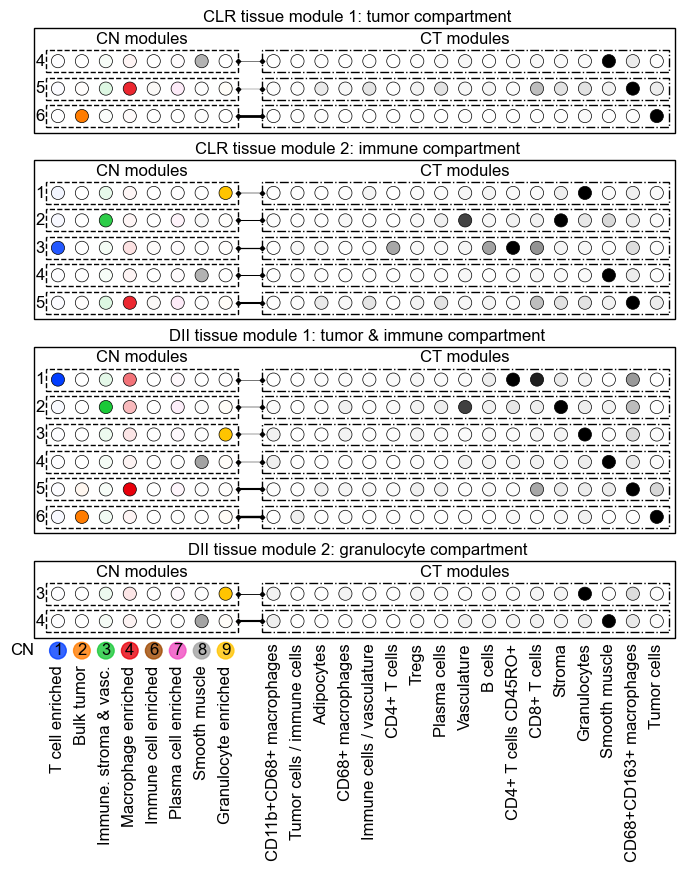

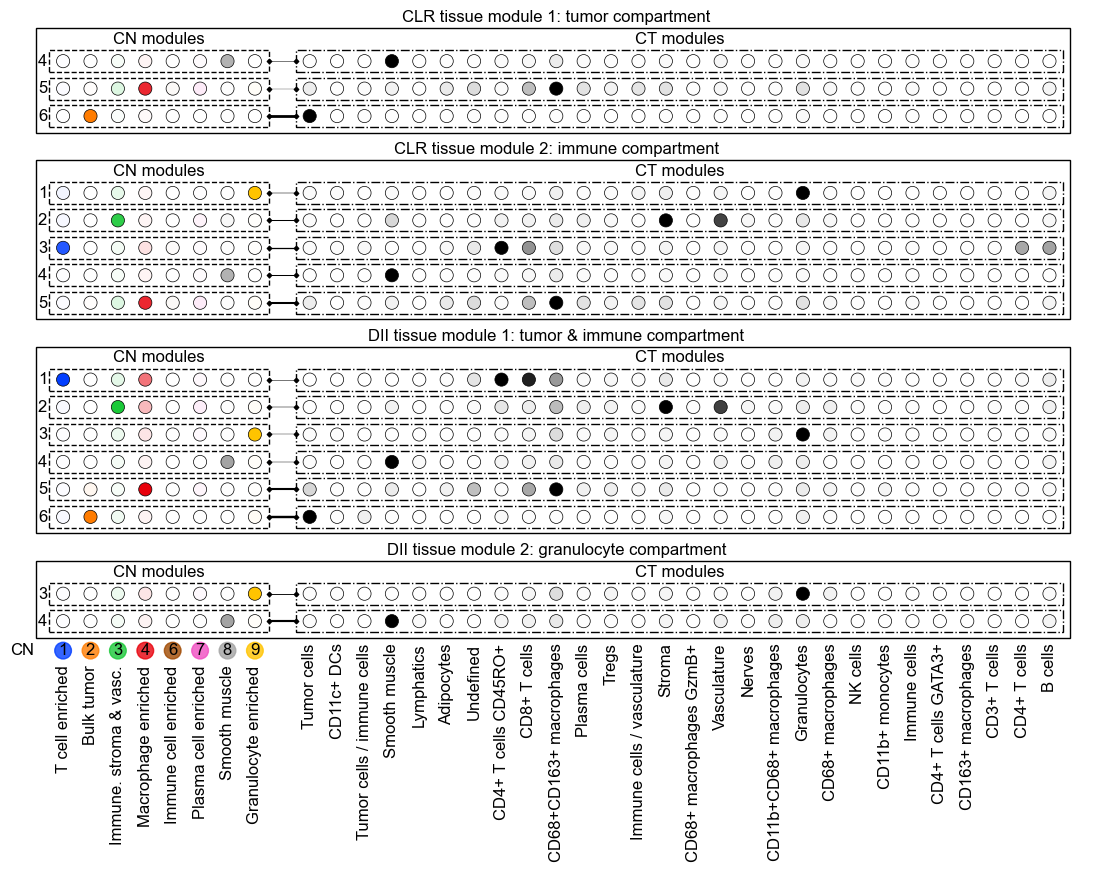

In [25]:
tensor_plots([dat1, dat2], ind, ['CLR', 'DII'], cells, cells_plot=cells_plot, tissue_modules=tissue_modules, savename='decomp.pdf')
tensor_plots([dat1, dat2], ind, ['CLR', 'DII'], cells, cells_plot=cells, tissue_modules=tissue_modules, savename='decomp_all.pdf')